# Import data and tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from scipy import stats

In [2]:
def Plot_features(columns, importance, n=None):
    if n is None:
        n = len(columns)
    df = pd.DataFrame({"features": columns, "feature_importance": importance}).sort_values("feature_importance", ascending=False).reset_index(drop=True)
    
    # Plot dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:n], color="orange")
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

In [3]:
df = pd.read_csv("California_Houses.csv")
pd.DataFrame(df)
df.head(25)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
7,241400.0,3.1200,52,3104,687,1157,647,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
8,226700.0,2.0804,42,2555,665,1206,595,37.84,-122.26,6363.948013,554949.749519,733820.824419,64751.463863,16744.406584
9,261100.0,3.6912,52,3549,707,1551,714,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [5]:
df.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

# Preprocessing data

## Add columns

In [6]:
# Recreate Median income 
df["Median_Income"] = df['Median_Income'] * 10000

# Calculate Rooms per Househo`ld
df["Rooms_per_Household"] = df["Tot_Rooms"] / df["Households"]

# Calculate Bedrooms per Household
df["Bedrooms_per_Household"] = df["Tot_Bedrooms"] / df["Households"]

# Calculate Population Density
df["Population_Density"] = df["Population"] / df["Households"]

# Calculate Income per person
df["Income_per_Person"] = df["Median_Income"] / df["Population"]

# Calculate Bedroom per room
df["bedrooms_per_room"] = df["Tot_Bedrooms"] / df["Tot_Rooms"]

# Sort dataframe by Income_per_Capita
df.sort_values(by = ["Median_Income"] , inplace = True , ascending = True)
df.reset_index(drop = True , inplace = True)

df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household,Bedrooms_per_Household,Population_Density,Income_per_Person,bedrooms_per_room
0,500001.0,4999.0,29,515,229,2690,217,34.02,-118.28,20782.079719,4903.715482,1.784060e+05,492267.727294,560283.065645,2.373272,1.055300,12.396313,1.858364,0.444660
1,162500.0,4999.0,36,15,5,15,6,33.90,-118.04,20062.518486,25284.432226,1.549555e+05,516841.295709,584873.507503,2.500000,0.833333,2.500000,333.266667,0.333333
2,500001.0,4999.0,28,238,58,142,31,34.15,-118.08,41929.399759,18582.673246,1.808454e+05,493757.905789,561778.907558,7.677419,1.870968,4.580645,35.204225,0.243697
3,56700.0,4999.0,15,661,146,131,57,40.43,-123.32,76601.400632,839189.650757,1.018320e+06,365576.429487,305125.270066,11.596491,2.561404,2.298246,38.160305,0.220877
4,112500.0,4999.0,52,62,9,44,16,34.06,-117.75,48392.475131,45488.118443,1.591607e+05,522019.963268,589975.949792,3.875000,0.562500,2.750000,113.613636,0.145161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,500001.0,150001.0,52,2248,255,813,265,34.07,-118.33,17257.043241,8193.083014,1.856118e+05,485048.179536,553063.888966,8.483019,0.962264,3.067925,184.503075,0.113434
20636,500001.0,150001.0,52,1482,171,531,161,34.07,-118.33,17257.043241,8193.083014,1.856118e+05,485048.179536,553063.888966,9.204969,1.062112,3.298137,282.487759,0.115385
20637,500001.0,150001.0,52,955,100,457,120,34.06,-118.32,17799.720527,7083.434291,1.841707e+05,486491.941831,554507.575103,7.958333,0.833333,3.808333,328.229759,0.104712
20638,500001.0,150001.0,52,3759,464,1407,422,34.08,-118.39,12771.138213,13826.775508,1.898057e+05,480624.278400,548627.437047,8.907583,1.099526,3.334123,106.610519,0.123437


## Sort the columns

In [7]:
new_order = ['Median_House_Value' , 'Median_Income' , 'Median_Age' , 'Tot_Rooms' , 'Tot_Bedrooms' , 
             'Population' , 'Households' , 'Latitude' , 'Longitude' ,'Rooms_per_Household' ,
             'Bedrooms_per_Household' , 'Population_Density' , 'Income_per_Person' , 'Distance_to_coast' , 'Distance_to_LA' ,
             'Distance_to_SanDiego' , 'Distance_to_SanJose' , 'Distance_to_SanFrancisco']
df = df[new_order]
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Rooms_per_Household,Bedrooms_per_Household,Population_Density,Income_per_Person,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,500001.0,4999.0,29,515,229,2690,217,34.02,-118.28,2.373272,1.055300,12.396313,1.858364,20782.079719,4903.715482,1.784060e+05,492267.727294,560283.065645
1,162500.0,4999.0,36,15,5,15,6,33.90,-118.04,2.500000,0.833333,2.500000,333.266667,20062.518486,25284.432226,1.549555e+05,516841.295709,584873.507503
2,500001.0,4999.0,28,238,58,142,31,34.15,-118.08,7.677419,1.870968,4.580645,35.204225,41929.399759,18582.673246,1.808454e+05,493757.905789,561778.907558
3,56700.0,4999.0,15,661,146,131,57,40.43,-123.32,11.596491,2.561404,2.298246,38.160305,76601.400632,839189.650757,1.018320e+06,365576.429487,305125.270066
4,112500.0,4999.0,52,62,9,44,16,34.06,-117.75,3.875000,0.562500,2.750000,113.613636,48392.475131,45488.118443,1.591607e+05,522019.963268,589975.949792


## Normalizing and Balancing data

In [8]:
# Split data to features and target
features = df.drop("Median_House_Value" , axis = 1)
target = df["Median_House_Value"]

# Balancing the data with RandomOverSampler
ros = RandomOverSampler(random_state = 9)
features_resampled, target_resampled = ros.fit_resample(features , target)

# Normalizing the data with StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_resampled)

# Create a new DataFrame with normalized data
scaled_df = pd.DataFrame(scaled_features, columns =features.columns)
scaled_df["Median_House_Value"] = target_resampled  

scaled_df.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Rooms_per_Household,Bedrooms_per_Household,Population_Density,Income_per_Person,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Median_House_Value
0,-2.05763,0.017027,-1.020506,-0.782514,1.093274,-0.795323,-0.776769,0.686725,-1.787733,-0.071782,3.780968,-0.576031,-0.342807,-1.079622,-0.786214,0.700922,0.730628,500001.0
1,-2.05763,0.573996,-1.235786,-1.316190,-1.291648,-1.345902,-0.834690,0.806308,-1.717684,-0.817259,-0.147201,3.837943,-0.357842,-0.996454,-0.868646,0.812370,0.827752,162500.0
2,-2.05763,-0.062540,-1.139771,-1.189919,-1.178420,-1.280668,-0.714022,0.786377,1.144125,2.667650,0.678675,-0.131903,0.099050,-1.023802,-0.777639,0.707681,0.736536,500001.0
3,-2.05763,-1.096910,-0.957644,-0.980260,-1.188227,-1.212824,2.317149,-1.824514,3.310385,4.986488,-0.227283,-0.092531,0.823495,2.324861,2.166211,0.126341,-0.277157,56700.0
4,-2.05763,1.847067,-1.215550,-1.306660,-1.265793,-1.319809,-0.757462,0.950804,-0.957655,-1.726856,-0.047967,0.912420,0.234091,-0.914008,-0.853864,0.835857,0.847904,112500.0


## Outlier Removal

In [9]:
columns = scaled_df.columns
outliers = pd.DataFrame(index=scaled_df.index)

for column in columns:
    
    z_scores = stats.zscore(scaled_df[column])
    #Finding Outliers
    outliers[column] = (z_scores > 3) | (z_scores < -3)
    
scaled_df['outlier_count'] = outliers.sum(axis=1)

#Removing OutLiers
df_cleaned = scaled_df[scaled_df['outlier_count'] <= 1]
df_cleaned = df_cleaned.drop(columns=['outlier_count'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3610195 entries, 0 to 3707529
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Median_Income             float64
 1   Median_Age                float64
 2   Tot_Rooms                 float64
 3   Tot_Bedrooms              float64
 4   Population                float64
 5   Households                float64
 6   Latitude                  float64
 7   Longitude                 float64
 8   Rooms_per_Household       float64
 9   Bedrooms_per_Household    float64
 10  Population_Density        float64
 11  Income_per_Person         float64
 12  Distance_to_coast         float64
 13  Distance_to_LA            float64
 14  Distance_to_SanDiego      float64
 15  Distance_to_SanJose       float64
 16  Distance_to_SanFrancisco  float64
 17  Median_House_Value        float64
dtypes: float64(18)
memory usage: 523.3 MB


# Create x , y ,train , test

In [10]:
np.random.seed(9)

# Create x & y
x = scaled_df.drop("Median_House_Value" , axis = 1)
y = scaled_df["Median_House_Value"]

# Split data into x_train x_test y_train y_test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

# LinearRegression

In [11]:
# Create model and fit it
model_LR = LinearRegression()
model_LR.fit(x_train , y_train)

# Model score
model_LR.score(x_test , y_test)

0.7031962739501016

In [12]:
# Evaluation Metrics
y_pred = model_LR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f" mean squared error: {mse} , mean absolute error: {mae}")

 mean squared error: 4377050658.936882 , mean absolute error: 50780.851799069154


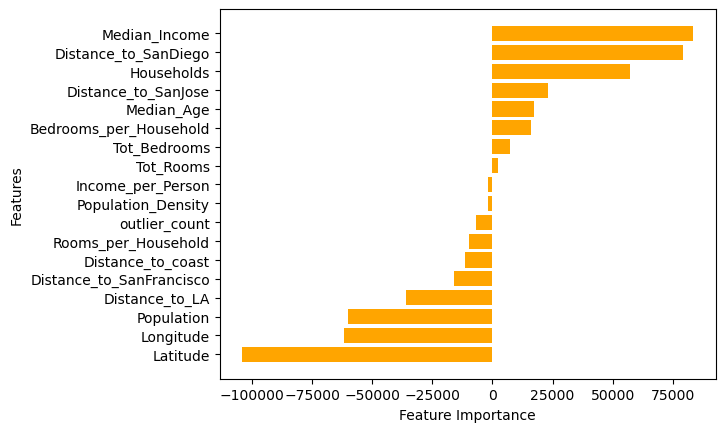

In [13]:
Plot_features(x_train.columns, model_LR.coef_)

# Recreate data 

(0.6391681660913668, None)

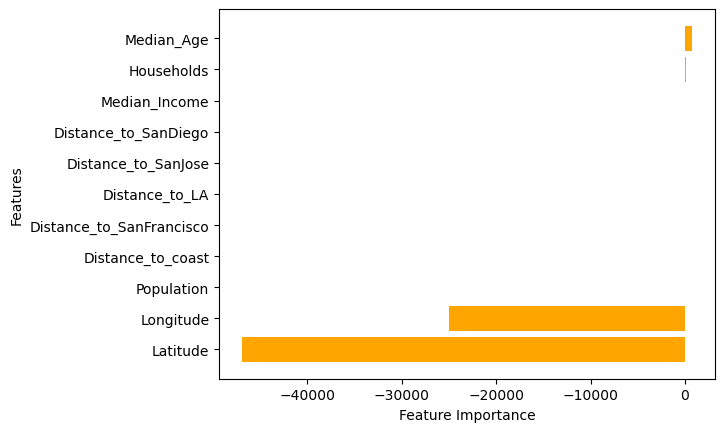

In [14]:
np.random.seed(9)

x = df.drop(["Median_House_Value" , "Bedrooms_per_Household" , "Tot_Bedrooms" , "Tot_Rooms" , "Population_Density" , "Income_per_Person" , "Rooms_per_Household"] , axis = 1)
y = df["Median_House_Value"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

model_LR = LinearRegression()
model_LR.fit(x_train , y_train)


model_LR.score(x_test , y_test)  , Plot_features(x_train.columns, model_LR.coef_)

# Create x , y ,train , test

In [15]:
np.random.seed(9)

# Create x & y
x = scaled_df.drop("Median_House_Value" , axis = 1)
y = scaled_df["Median_House_Value"]

# Split data into x_train x_test y_train y_test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

# RandomForestRegression

In [16]:
# Instantiate model
model_RFR = RandomForestRegressor(random_state = 9)

# Fit the model
model_RFR.fit(x_train , y_train)

# Score the model
model_RFR.score(x_test , y_test)

KeyboardInterrupt: 

In [16]:
%%time
# Different RandomForestRegressor hyperparameters
rf_grid = {
            "n_estimators": np.arange(10, 150, 10) , 
            "max_depth": [None, 3, 5, 10, 15, 20] , 
            "min_samples_split": np.arange(2, 21, 3) , 
            "min_samples_leaf": np.arange(1, 21, 3) ,
            "max_features": [0.5, 0.75, 1, "sqrt", "log2"]}

# Instantiate GridSearchCV model
best_model_RFR = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=9),
    param_grid=rf_grid,
    cv=5,
    verbose=True)

# Fit the RandomSearchCV model
best_model_RFR.fit(x_train , y_train)
best_model_RFR.best_params_ , best_model_RFR.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 2d 8h 52s
Wall time: 8h 12min 21s


({'n_estimators': 20,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': None},
 0.9998095447856323)

In [17]:
# Setup best model with best parameters
best_params = best_model_RFR.best_params_
final_model_RFR = RandomForestRegressor(**best_params, n_jobs=-1, random_state=9)

# Fit the best RandomSearchCV model
final_model_RFR.fit(x_train , y_train)

# Model score
final_model_RFR.score(x_test , y_test)

0.9998269611184275

In [18]:
# Evaluation Metrics
y_pred = final_model_RFR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f" mean squared error: {mse} , mean absolute error: {mae}")

 mean squared error: 2551854.589861336 , mean absolute error: 21.50012148480249


In [19]:
# Feature Importance
final_model_RFR.feature_importances_

array([0.28624907, 0.01911607, 0.02513644, 0.01530396, 0.01176107,
       0.0162613 , 0.05255621, 0.0344028 , 0.041061  , 0.01136591,
       0.06957652, 0.06722071, 0.18355219, 0.04962269, 0.03007882,
       0.04859084, 0.03814442])

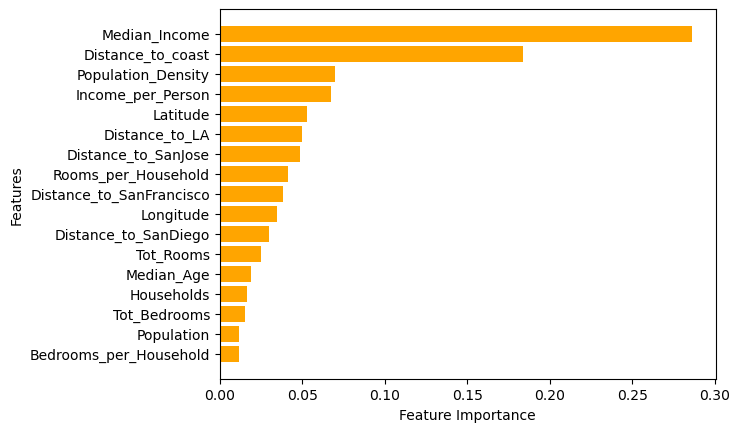

In [20]:
Plot_features(x_train.columns , final_model_RFR.feature_importances_)

# DecisionTreeRegressor

In [12]:
# Create and fit model
model_DTR = DecisionTreeRegressor()
model_DTR.fit(x_train , y_train)

# Model score
model_DTR.score(x_test , y_test)

0.9997812729158465

In [ ]:
%%time
# Define the parameter grid
dt_grid = {"max_depth" : [None, 3, 5, 10, 15, 20] , 
           "min_samples_split" : np.arange(2, 21, 3) , 
           "min_samples_leaf" : np.arange(1, 21, 3) ,
           "max_features" : [None, "sqrt", "log2"] , 
           "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"] , 
           "splitter" : ["best" , "random"] ,
           "ccp_alpha": [0.0 , 0.1 , 0.2]}

# Instantiate GridSearchCV model
best_model_DTR = RandomizedSearchCV(DecisionTreeRegressor(random_state=9) , param_distributions=dt_grid , cv=5 , verbose=True ,  n_iter = 100)

# Fit the GridSearchCV model
best_model_DTR.fit(x_train , y_train)
best_model_DTR.best_params_ , best_model_RFR.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [18]:
# Setup best model with best parameters
best_params = best_model_DTR.best_params_
final_model_DTR = DecisionTreeRegressor(**best_params , random_state=9)

# Fit the best RandomSearchCV model
final_model_DTR.fit(x_train , y_train)

# Model score
final_model_DTR.score(x_test , y_test)

NameError: name 'best_model_DTR' is not defined

In [19]:
# Evaluation Metrics
y_pred = final_model_DTR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f" mean squared error: {mse} , mean absolute error: {mae}")

NameError: name 'final_model_DTR' is not defined

In [20]:
Plot_features(x_train.columns , final_model_DTR.feature_importances_)

NameError: name 'final_model_DTR' is not defined

In [21]:
# Evaluation Metrics
y_pred = final_model_DTR.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f" mean squared error: {mse} , mean absolute error: {mae}")

 mean squared error: 3225631.7687206846 , mean absolute error: 17.11408538838526


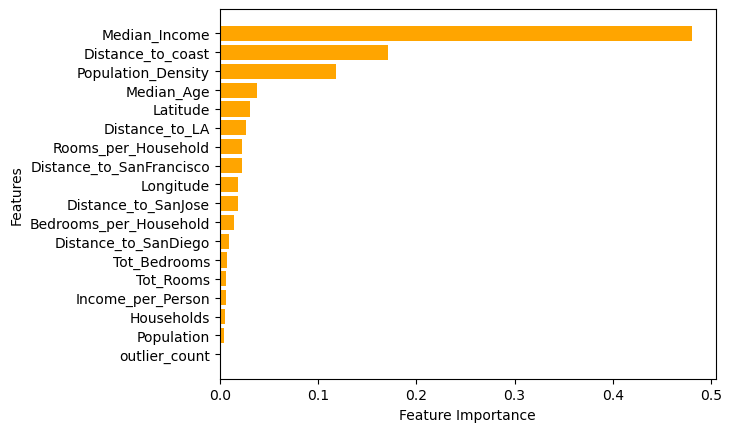

In [22]:
Plot_features(x_train.columns , final_model_DTR.feature_importances_)

# Plot models score

In [19]:
# Model scores with two decimal precision
model_scores = {
    "RandomForestRegressor" : float(f"{final_model_RFR.score(x_test, y_test) * 100 : .2f}"),
    "DecisionTreeRegressor" : float(f"{final_model_DTR.score(x_test, y_test) * 100 : .2f}"),
    "LinearRegression" : float(f"{model_LR.score(x_test, y_test) * 100 : .2f}")}

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(model_scores.keys() , model_scores.values() , color = "plasma")

ax.set_xlabel("Models")
ax.set_ylabel("Scores (%)")
ax.set_title("Train models score with best parameters")

plt.show()

NameError: name 'final_model_RFR' is not defined